<img src="logo_UTN.svg" align="right" width="150">

# Tarea Semanal 1
### Autor: Tobías Guerrero

## Consigna

<img src="circuito.png" align="center" width="500">

Para el circuito de la imagen, se pide: 
1. Obtener la transferencia $\frac{V_{2}}{V_{1}}$
2. Especificar qué tipo de filtro es
3. Obtener la función transferencia normalizada
4. Simular la transferencia normalizada
5. Simular el circuito para los valores: $\frac{R_{2}}{R_{1}} = 1$, $R_{3} = 10k\Omega$ y $C = 1\mu F$
6. Indicar qué tipo de utilidad podría tener este tipo de circuito

## 1. Obtención de la transferencia

En el anexo de esta presentación se incluyen los cálculos realizados en papel para obtener la transferencia. Por simplicidad, en este punto se incluye únicamente el resultado obtenido: 

$\large T_{(s)} = \frac{V_{2}}{V_{1}} = \frac{s -\frac{R_{2}}{R_{1} \cdot R_{3} \cdot C}}{s + \frac{1}{R_{3} \cdot C}}$

El diagrama de polos y ceros obtenido para esta transferencia resulta: 

<img src="polos y ceros.png" align="center" width="500">

La respuesta de módulo y fase se obtuvo mediante simulación en Python:

In [1]:
# Importo las librerías
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

In [2]:
# Se asignan valores a los componentes para poder realizar la simulación. Se tomaron los valores pedidos para el punto 5.
# Esto podría modificarse realizando una simulación simbólica mediante SymPy.
R1 = 1
R2 = 1
R3 = 1000 
C = 0.000001

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tobia\AppData\Local\Temp\ipykernel_4912\3029924009.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,1000])


(0.00630957344480193, 1000)

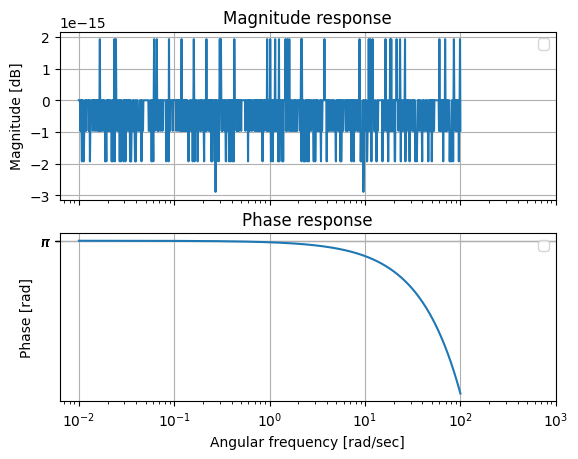

In [3]:
# Se plantea la transferencia con la función TransferFunction
my_tf = TransferFunction( [1,-R2/(R1*R3*C)], [1,1/(R3*C)] )
# Se realizan los gráficos de Bode de módulo y fase. Se ajustan las escalas para poder observarlos correctamente.
bodePlot(my_tf, fig_id=1, filter_description = '' )
plt.xlim([0,1000])

## 2. Tipo de filtro

En función de la transferencia obtenida, y de los gráficos de módulo y fase, se puede afirmar que el circuito propuesto es una implementación de un filtro pasatodo.

<img src="filtro_Schaumann.png" align="center">

Esta imagen fue obtenida de la tabla 3.1 de la página 77 del libro _Design of Analog filters_ de Schaumann y Van Vankelburg. Se observa que tanto la expresión de la transferencia como los gráficos de módulo y fase coinciden con los obtenidos. Una aclaración no menor es que, para que la coincidencia sea plena, $R_{2}$ debe ser igual a $R_{1}$ en el caso propuesto.

## 3. Transferencia normalizada

Para obtener la transferencia normalizada, se definen las normas de impedancia y frecuencia, respectivamente, como:
- $\Omega_{Z} = R_{3}$

- $\Omega_{\omega} = \frac{1}{C \cdot R_{3}}$

De esta forma, los valores de los componentes resultan: 

- $R_{1n} = \frac{R_{1}}{R_{3}}$
- $R_{2n} = \frac{R_{2}}{R_{3}}$
- $R_{3n} = 1$
- $C = 1$

Y la transferencia resulta:

$ \large T_{(s)n} = \frac{s-\frac{R_{2}}{R_{1}}}{s+1}$

Donde nuevamente se observa que para cumplir con la expresión de un filtro pasatodo, $R_{2}$ y $R_{1}$ deben ser iguales.

## 4. Simulación normalizada

Para simular la transferencia normalizada, se utilizó el mismo script desarrollado en el punto 1., asignando los valores $R_{3} = 1$ y $C = 1$. Los valores de $R_{2}$ y $R_{1}$ no resultan críticos; lo importante es que su relación sea unitaria, como ya se explicó anteriormente. 

In [4]:
R1 = 1
R2 = 1
R3 = 1
C = 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tobia\AppData\Local\Temp\ipykernel_4912\233122087.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,1000])


(0.00630957344480193, 1000)

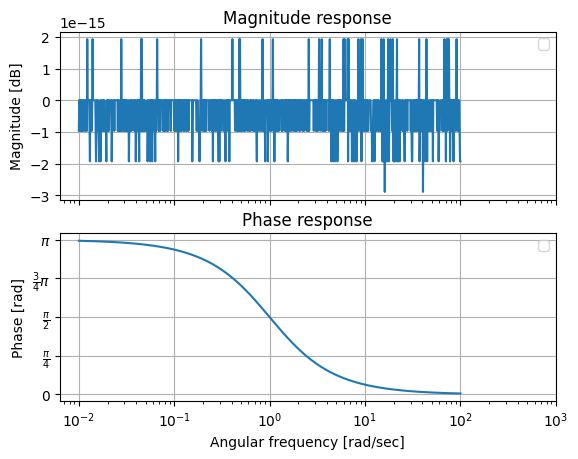

In [5]:
my_tf = TransferFunction( [1,-R2/(R1*R3*C)], [1,1/(R3*C)] )
bodePlot(my_tf, fig_id=1, filter_description = '' )
plt.xlim([0,1000])

Como es esperable, se obtuvieron los mismos gráficos que en el primer punto.

## 5. Simulación no normalizada

La simulación para este punto se realizó en el primer punto, al desarrollar la transferencia, para comprobar la misma.

En esa instancia se comprobó que los gráficos coincidían con lo hallado teóricamente. Además, se contrastó lo obtenido con la simulación normalizada, comparación que también resultó satisfactoria.

## 6. Utilidad de los filtros pasatodo

A partir de lo obtenido, se observa que el filtro pasatodo es un filtro que mantiene el módulo para todas las frecuencias, mientras que invierte (introduce una fase de $\pi = 180°$) para frecuencias bajas, y mantiene la fase para frecuencias altas, pasando por una fase de $\frac{\pi}{2} = 90°$ en la frecuencia de corte.

Este tipo de respuesta resulta útil cuando se desea invertir determinadas frecuencias y dejar otras sin modificar, sin alterar en ningún caso el módulo. 

Una posible aplicación de este tipo de filtros sería corregir la modificación de fase introducida por cierto tipo de filtros, por ejemplo filtros IIR. Este tipo de filtros no suelen tener fase lineal, con lo cual introducir un filtro pasatodo podría resultar útil para corregir estas alinealidades en fase. También pueden servir para crear efectos de sonido en donde se busque "jugar" con la fase de la señal para obtener distintos efectos, sin que esto implique modificar el módulo de la misma. (https://www.youtube.com/watch?v=E80JzPVBjOA)

## Anexo: cálculos en papel

In [6]:
from IPython.display import IFrame
IFrame("./TS1.pdf", width=1000, height=1000)